# Analiza Sentiment leksikona -SVM + NB



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a1.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
0,ENG30-03574555-n,0.000,0.000,ustanova,zgrada u kojoj se nalazi organizaciona jedinic...,n,1.000
1,ENG30-07810907-n,0.000,0.000,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,1.000
2,ENG30-00721431-n,0.000,0.500,mesto,"u nečijim prilikama, mogućnostima",n,0.500
3,ENG30-00473799-v,0.000,0.375,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese ...,v,0.625
4,ENG30-00903385-v,0.000,0.375,oprostiti,Zapad mu je oprostio što se nekada računao u S...,v,0.625
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,0.000,0.250,mandat,mandat predsednika,n,0.750
25316,ENG30-15266685-n,0.125,0.000,sredina,vreme između početka i kraja vremenskog perioda,n,0.875
25317,ENG30-15266911-n,0.000,0.125,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.875
25318,ENG30-15276642-n,0.000,0.000,"b/s,bitova u sekundi",(računarstvo) brzina prenosa podataka (npr. ko...,n,1.000


## Statistike

Raspored reči prema pozitivnom polaritetu 

In [6]:
sent_an["POS"].value_counts()

0.000    20758
0.125     2580
0.250     1082
0.375      631
0.500      198
0.625       45
0.750       17
1.000        5
0.875        4
Name: POS, dtype: int64

In [7]:
sent_an[sent_an["POS"]>.9]["Lemme"]

1759                                    intelektualan,uman
8922                    gorka čokolada,čokolada za kuvanje
17664    fantastičan,veličanstven,izvanredan,sjajan,izv...
22455                       nekomunikativan,nerazgovorljiv
23386                                              sricati
Name: Lemme, dtype: object

Raspored reči prema negativnom polaritetu 

In [8]:
sent_an["NEG"].value_counts()

0.000    9902
0.125    6333
0.250    4196
0.375    3966
0.500     643
0.625     125
0.750      64
0.875      49
1.000      42
Name: NEG, dtype: int64

In [9]:
sent_an[sent_an["NEG"]>.9]["Lemme"]

30                                        smrskati,skršiti
858                                 zlostavljanje,zlostava
903                                      tugovati,žalovati
1299                                ne odobravati,zamerati
2041                                          pogoršati se
2727                                          žaljenje,žal
2826                                             rasturiti
3364                                        povreda,ozleda
5567                                         partizanovati
5895                           rizikovati,staviti na kocku
6661                                          neprijaznost
6832                                  uništiti,upropastiti
6833     uprskati,upropastiti,zabrljati,zakrmačiti,zasv...
7735                                         nositi crninu
7867                                        ureći,ureknuti
7956                                                hladan
12044                                             izgore

In [10]:
(sent_an["NEG"]>.9).sum()

42

In [11]:
sent_an[sent_an["POS"]>.9]["Lemme"]

1759                                    intelektualan,uman
8922                    gorka čokolada,čokolada za kuvanje
17664    fantastičan,veličanstven,izvanredan,sjajan,izv...
22455                       nekomunikativan,nerazgovorljiv
23386                                              sricati
Name: Lemme, dtype: object

In [12]:
(sent_an["POS"]>.9).sum()

5

Raspored reči prema objektivnosti 

In [13]:
sent_an["OBJ"].value_counts()

1.000    7290
0.875    6364
0.750    5154
0.625    4918
0.500    1078
0.375     280
0.250     131
0.125      57
0.000      48
Name: OBJ, dtype: int64

In [14]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<AxesSubplot: title={'center': 'POS'}>,
        <AxesSubplot: title={'center': 'NEG'}>],
       [<AxesSubplot: title={'center': 'OBJ'}>, <AxesSubplot: >]],
      dtype=object)

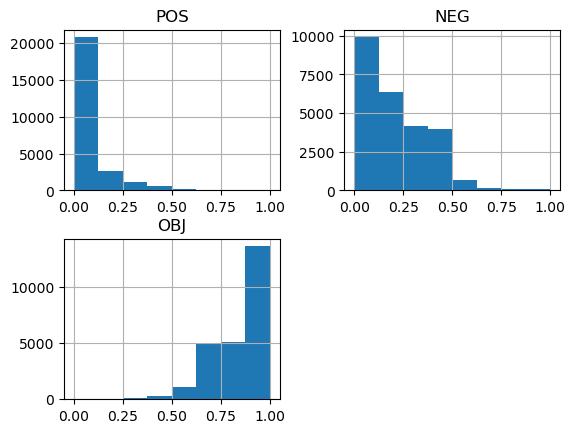

In [15]:
sent_an.hist(bins=8)

<AxesSubplot: >

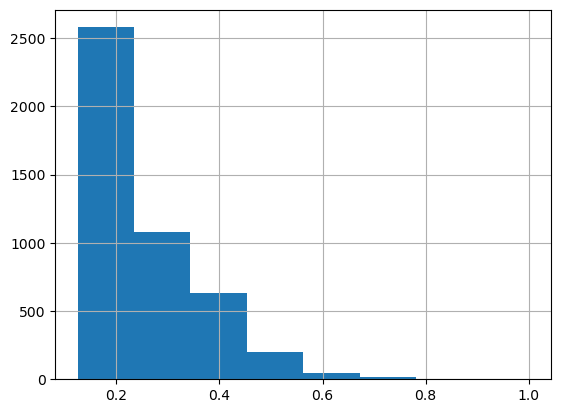

In [16]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<AxesSubplot: >

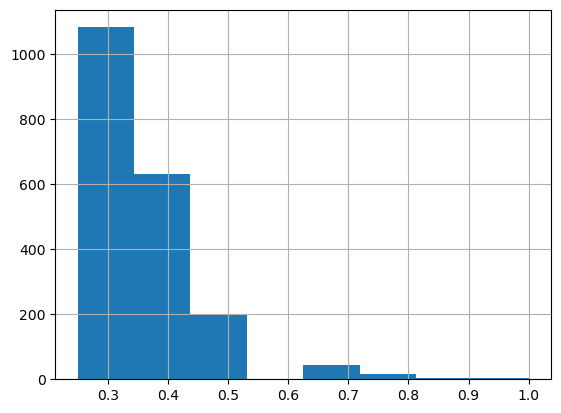

In [17]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<AxesSubplot: >

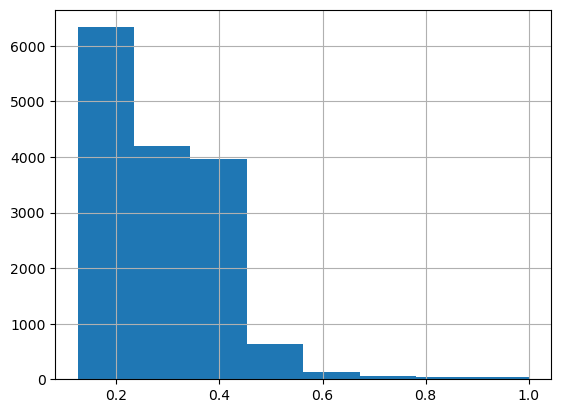

In [18]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<AxesSubplot: >

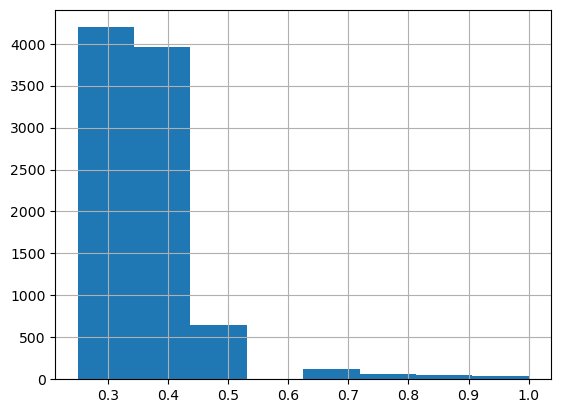

In [19]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [20]:
sent_an["Vrsta"].value_counts(sort=True)

n    20080
v     2896
a     2202
b      142
Name: Vrsta, dtype: int64

<AxesSubplot: ylabel='Vrsta'>

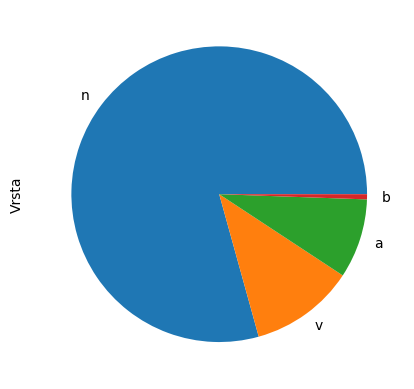

In [21]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

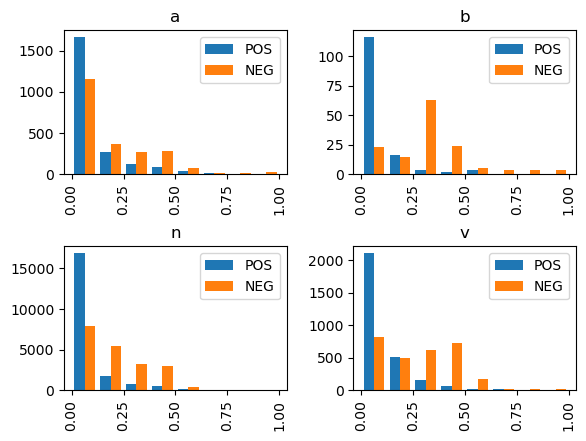

In [22]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

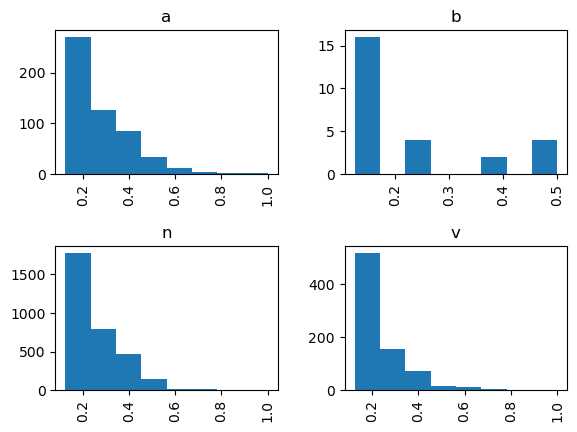

In [23]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

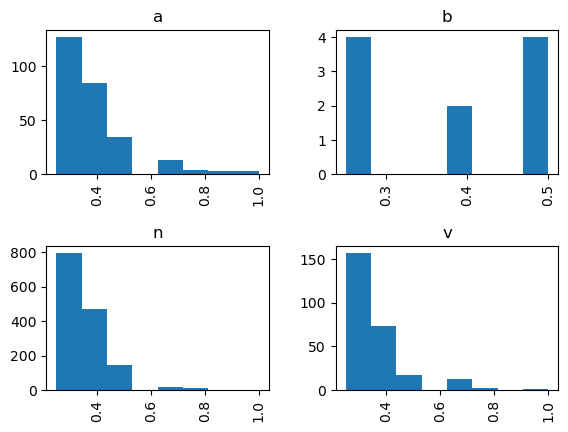

In [24]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

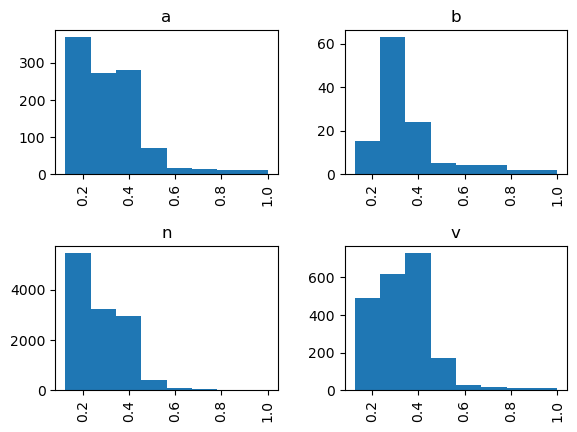

In [25]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

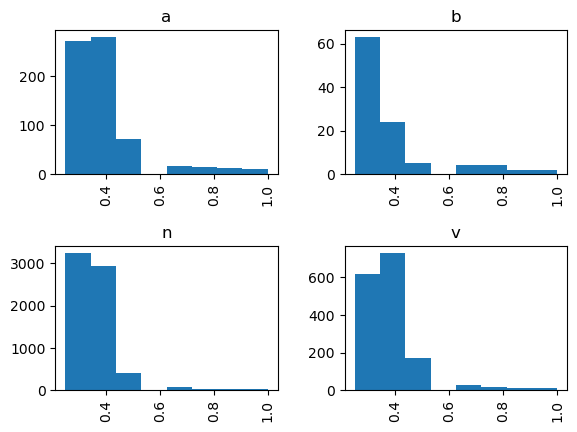

In [26]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

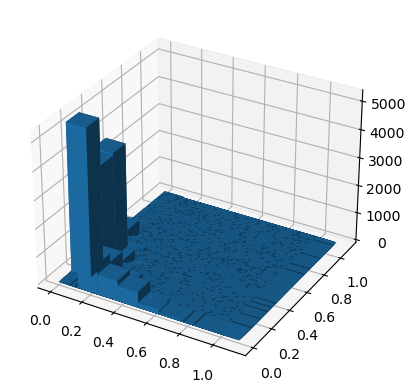

In [27]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<AxesSubplot: >

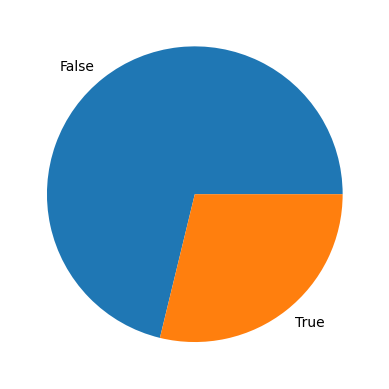

In [28]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<AxesSubplot: >

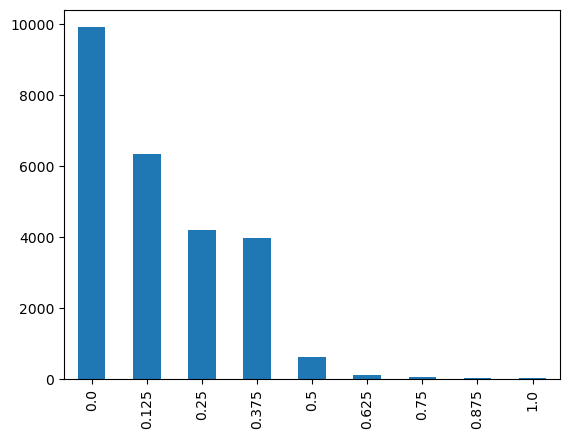

In [29]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<AxesSubplot: >

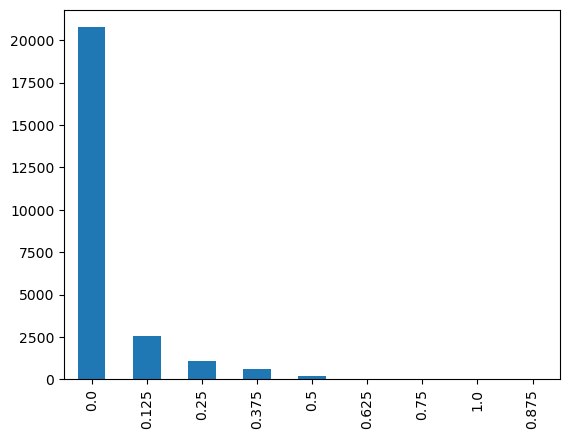

In [30]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [31]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<AxesSubplot: >

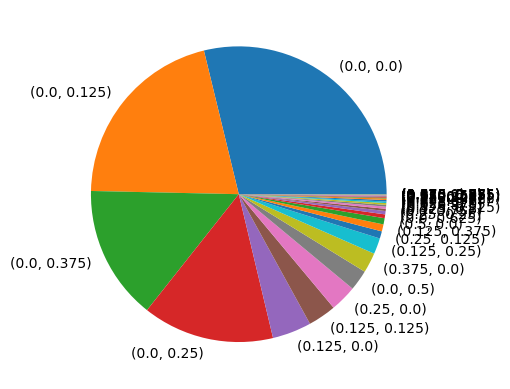

In [32]:
a.plot(kind ="pie")

In [33]:
sent_an["Vrsta"].value_counts()

n    20080
v     2896
a     2202
b      142
Name: Vrsta, dtype: int64

<AxesSubplot: title={'center': 'imenice-negativno'}>

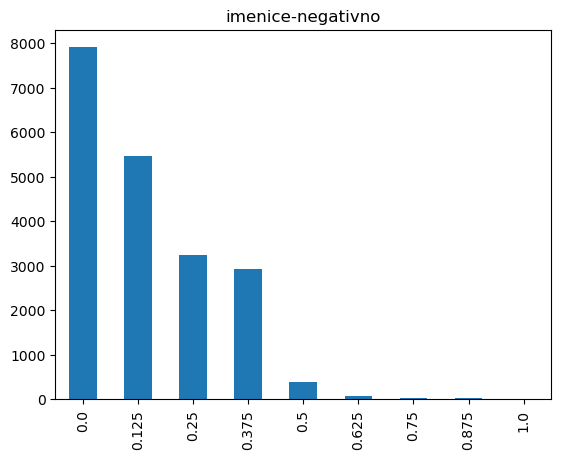

In [34]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<AxesSubplot: title={'center': 'imenica-positivno'}>

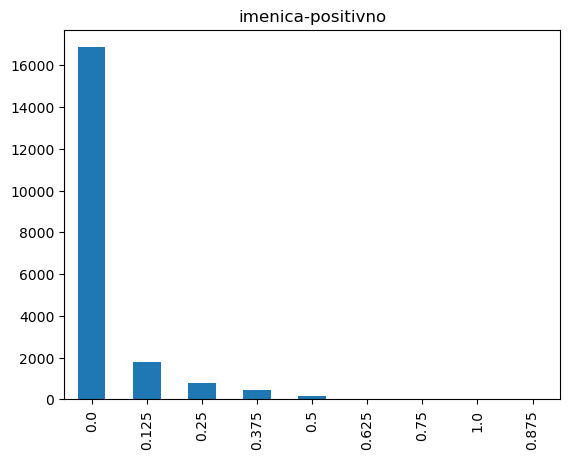

In [35]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<AxesSubplot: title={'center': 'glagol-negativno'}>

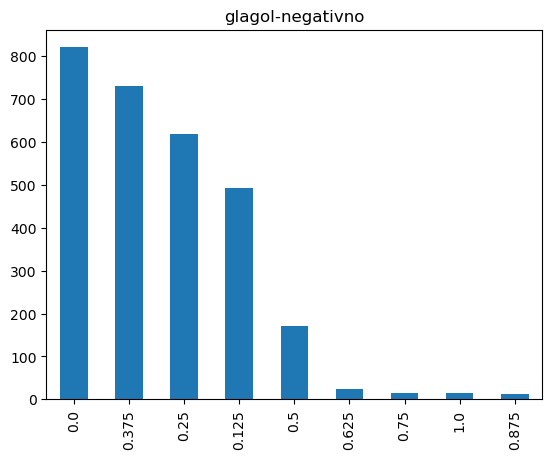

In [36]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<AxesSubplot: title={'center': 'glagol-positivno'}>

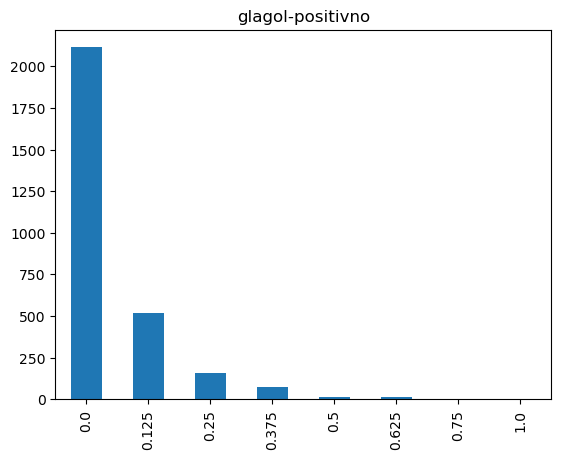

In [37]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<AxesSubplot: title={'center': 'pridev-negativno'}>

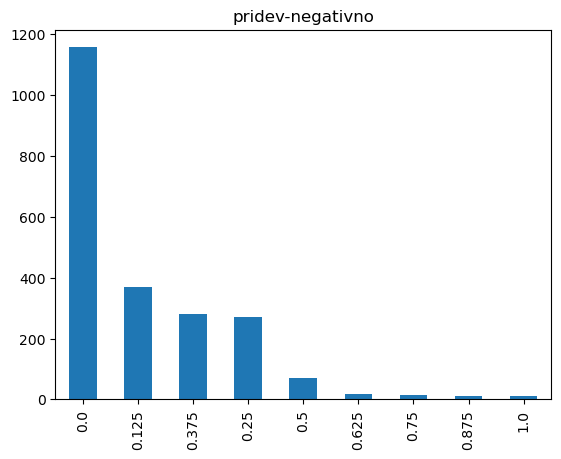

In [38]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<AxesSubplot: title={'center': 'pridev-positivno'}>

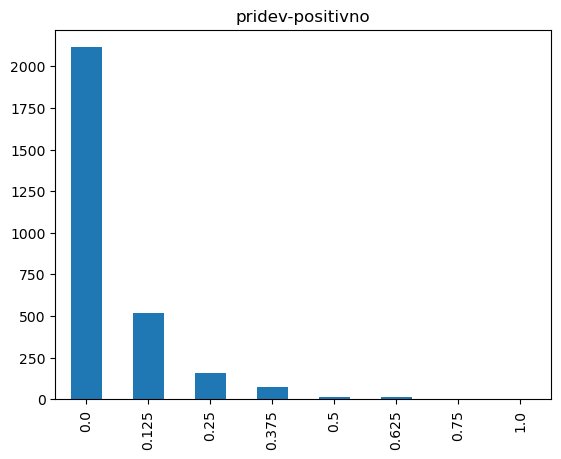

In [39]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

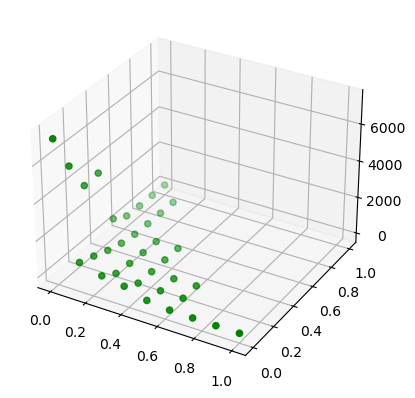

In [40]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [41]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

POS    NEG    Vrsta
0.000  0.000  n        6045
       0.125  n        4735
       0.250  n        2852
       0.375  n        2759
       0.000  a         818
                       ... 
0.375  0.375  a           1
0.125  0.500  a           1
0.250  0.375  b           1
0.125  0.875  n           1
1.000  0.000  v           1
Length: 115, dtype: int64

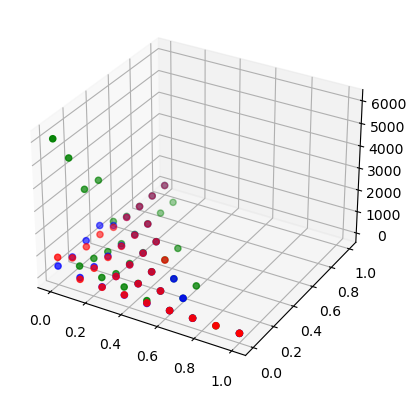

In [42]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [43]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs